### Diamonds are a Data Scientist's Best Friend

In [8]:
## Load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load diamond dataset
df = pd.read_csv("data/diamonds.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
## x = Length in mm
## y = Width in mm
## z = Depth in mm
df = df.sort_values(by="price", ascending=False)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01


### Levels of 3 C's
The levels representing the 3 C's: Color, Cut, and Clarity are defined in the index. 

In [9]:
df.groupby('color').count()

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
D,6775,6775,6775,6775,6775,6775,6775,6775,6775
E,9797,9797,9797,9797,9797,9797,9797,9797,9797
F,9542,9542,9542,9542,9542,9542,9542,9542,9542
G,11292,11292,11292,11292,11292,11292,11292,11292,11292
H,8304,8304,8304,8304,8304,8304,8304,8304,8304
I,5422,5422,5422,5422,5422,5422,5422,5422,5422
J,2808,2808,2808,2808,2808,2808,2808,2808,2808


In [10]:
df.groupby('cut').count()

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [11]:
df.groupby('clarity').count()

,carat,cut,color,depth,table,price,x,y,z
clarity,,,,,,,,,
I1,741,741,741,741,741,741,741,741,741
IF,1790,1790,1790,1790,1790,1790,1790,1790,1790
SI1,13065,13065,13065,13065,13065,13065,13065,13065,13065
SI2,9194,9194,9194,9194,9194,9194,9194,9194,9194
VS1,8171,8171,8171,8171,8171,8171,8171,8171,8171
VS2,12258,12258,12258,12258,12258,12258,12258,12258,12258
VVS1,3655,3655,3655,3655,3655,3655,3655,3655,3655
VVS2,5066,5066,5066,5066,5066,5066,5066,5066,5066


### Cutting and Polishing Data for Display

In [2]:
## Cut diamonds that skew carat range
indicies_to_remove = [27415, 27630, 27130]
df = df.drop(indicies_to_remove)

## Convert Column Classes to Rankings
clarity={
'IF':7,
'VVS1':6,
'VVS2':5,
'VS1':4,
'VS2':3,
'SI1':2,
'SI2': 1,
'I1':0
}

cut={
'Ideal':4,
'Premium':3,
'Very Good':2,
'Good': 1,
'Fair':0
}

color={
'D':6,
'E':5,
'F':4,
'G':3,
'H':2,
'I': 1,
'J':0
}

## Map dictionary values to new columns
df['Clarity'] = df['clarity'].map(clarity)
df['Cut'] = df['cut'].map(cut)
df['Color'] = df['color'].map(color)
df['price'] = df['price'].astype(float)


## Convert all rankings and contiguous data to scale between 0-100
factors = ['Cut', 'Color', "Clarity", "carat", "price"]

new_max = 100
new_min = 0
new_range = new_max - new_min

for factor in factors:
    max_val = df[factor].max()
    min_val = df[factor].min()
    val_range = max_val - min_val
    df[factor + '_Adj'] = df[factor].apply(lambda x: (((x - min_val) * new_range) / val_range) + new_min)

## Subset scaled columns 
df2 = df[['Cut_Adj', "Color_Adj", "Clarity_Adj", "carat_Adj", "price_Adj"]]
df2.columns = ['Cut', "Color", "Clarity", "Carat", "Price"]
df2.head()

,Cut,Color,Clarity,Carat,Price
27749,75,16,42,54.855643,100.000000
27748,50,50,28,47.244094,99.972969
27747,100,50,100,34.383202,99.908093
27746,100,50,14,49.081365,99.897281
27745,50,33,28,47.244094,99.891874


In [3]:
df2 = df2.sort_values(by="Price", ascending=False)
## Most Expensive Diamonds
print(df2.head(1))
## Least Expensive Diamonds
print(df2.tail(2))

       Cut  Color  Clarity      Carat  Price
27749   75     16       42  54.855643  100.0
   Cut  Color  Clarity     Carat  Price
1   75     83       28  0.262467    0.0
0  100     83       14  0.787402    0.0


### The Star of the Show

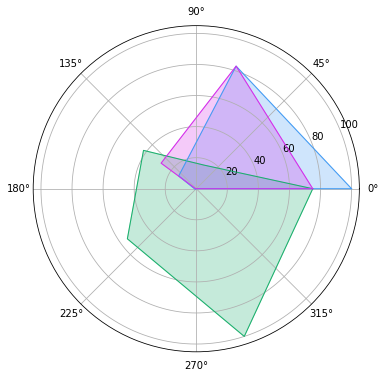

In [12]:
## Points in this star
labels = ['Cut', "Color", "Clarity", "Carat", "Price"]
points = len(labels)

angles = np.linspace(0, 2 * np.pi, points, endpoint=False).tolist()
angles += angles[:1]

def add_to_star(diamond, color, label=None):
    values = df2.loc[diamond].tolist()
    values += values[:1]
    if label != None:
        ax.plot(angles, values, color=color, linewidth=1, label=label)
    else:
        ax.plot(angles, values, color=color, linewidth=1, label=diamond)
    ax.fill(angles, values, color=color, alpha=0.25)
    
## Create plot object   
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))  

## Plot a new diamond with the add_to_star function
add_to_star(27749, '#1aaf6c', "Most Expensive Diamond")
add_to_star(0, '#429bf4', "Least Expensive A")
add_to_star(1, '#d42cea', "Least Expensive B")

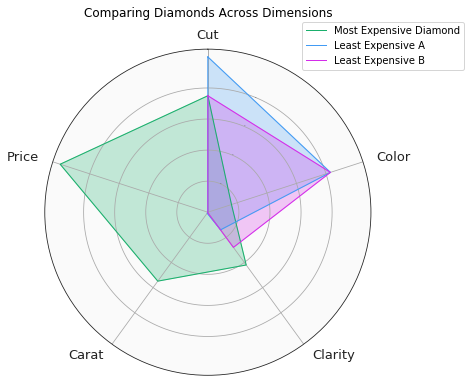

In [14]:
## Points in this star
labels = ['Cut', "Color", "Clarity", "Carat", "Price"]
points = len(labels)

angles = np.linspace(0, 2 * np.pi, points, endpoint=False).tolist()
angles += angles[:1]

def add_to_star(diamond, color, label=None):
    values = df2.loc[diamond].tolist()
    values += values[:1]
    if label != None:
        ax.plot(angles, values, color=color, linewidth=1, label=label)
    else:
        ax.plot(angles, values, color=color, linewidth=1, label=diamond)
    ax.fill(angles, values, color=color, alpha=0.25)
    
## Create plot object   
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))  

## Plot a new diamond with the add_to_star function
add_to_star(27749, '#1aaf6c', "Most Expensive Diamond")
add_to_star(0, '#429bf4', "Least Expensive A")
add_to_star(1, '#d42cea', "Least Expensive B")

## Fix axis to star from top
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

## Edit x axis lables
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

        
## Customize your graphic

# Change the location of the gridlines or remove them
ax.set_rgrids([20, 40, 60 ,80])
#ax.set_rgrids([]) # This removes grid lines

# Change the color of the ticks
ax.tick_params(colors='#222222')
# Make the y-axis labels larger, smaller, or remove by setting fontsize
ax.tick_params(axis='y', labelsize=0)
# Make the x-axis labels larger or smaller.
ax.tick_params(axis='x', labelsize=13)

# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outer circle
ax.spines['polar'].set_color('#222222')
# Change the circle background color
ax.set_facecolor('#FAFAFA')

# Add title and legend
ax.set_title('Comparing Diamonds Across Dimensions', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

plt.savefig('images/foo.png', bbox_inches='tight', dpi=300)

### Best Bling for Your Buck

In [5]:
## Get total value of 4 C's
df['Total'] = df['Cut_Adj'] + df['Color_Adj'] + df['Clarity_Adj'] + df['carat_Adj']
df = df.sort_values(by="Total", ascending=False)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Clarity,Cut,Color,Cut_Adj,Color_Adj,Clarity_Adj,carat_Adj,price_Adj,Total
26965,1.07,Ideal,D,IF,60.9,54.0,17042.0,6.66,6.73,4.08,7,4,6,100,100,100,22.834646,90.371412,322.834646
26311,1.06,Ideal,D,IF,61.2,57.0,15813.0,6.57,6.61,4.03,7,4,6,100,100,100,22.572178,83.727091,322.572178
25718,1.04,Ideal,D,IF,61.8,57.0,14626.0,6.52,6.49,4.02,7,4,6,100,100,100,22.047244,77.309834,322.047244
25622,1.04,Ideal,D,IF,61.8,57.0,14494.0,6.49,6.52,4.02,7,4,6,100,100,100,22.047244,76.596205,322.047244
27226,1.03,Ideal,D,IF,62.0,56.0,17590.0,6.55,6.44,4.03,7,4,6,100,100,100,21.784777,93.334054,321.784777


In [6]:
## Divide Value total by Price
df['4C_by_Price'] = df['Total']/df['price']
df = df.sort_values(by="4C_by_Price", ascending=False)
print(df.tail(1))
print(df.head(1))

       carat   cut color clarity  depth  table    price     x     y     z  \
26320    2.4  Fair     J     SI2   65.4   56.0  15824.0  8.35  8.29  5.44   

       Clarity  Cut  Color  Cut_Adj  Color_Adj  Clarity_Adj  carat_Adj  \
26320        1    0      0        0          0           14  57.742782   

       price_Adj      Total  4C_by_Price  
26320   83.78656  71.742782     0.004534  
       carat    cut color clarity  depth  table  price     x     y     z  \
31597    0.2  Ideal     D     VS2   61.5   57.0  367.0  3.81  3.77  2.33   

       Clarity  Cut  Color  Cut_Adj  Color_Adj  Clarity_Adj  carat_Adj  \
31597        3    4      6      100        100           42        0.0   

       price_Adj  Total  4C_by_Price  
31597   0.221658  242.0     0.659401  


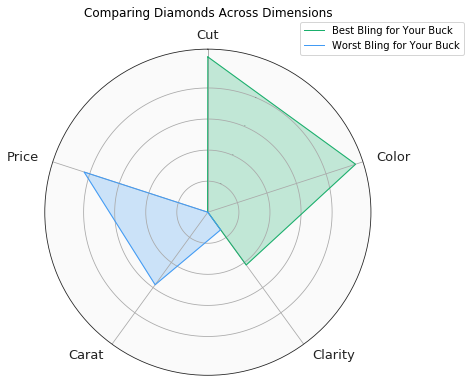

In [15]:
## Points in this star
labels = ['Cut', "Color", "Clarity", "Carat", "Price"]
points = len(labels)

angles = np.linspace(0, 2 * np.pi, points, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_to_star(diamond, color, label=None):
    values = df2.loc[diamond].tolist()
    values += values[:1]
    if label != None:
        ax.plot(angles, values, color=color, linewidth=1, label=label)
    else:
        ax.plot(angles, values, color=color, linewidth=1, label=diamond)
    ax.fill(angles, values, color=color, alpha=0.25)

## Plot a new diamond with the add_to_star function
add_to_star(31597, '#1aaf6c', "Best Bling for Your Buck")
add_to_star(26320, '#429bf4', "Worst Bling for Your Buck")

## Fix axis to star from top
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

## Edit x axis lables
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

        
## Customize your graphic

# Change the location of the gridlines or remove them
ax.set_rgrids([20, 40, 60 ,80])
#ax.set_rgrids([]) # This removes grid lines

# Change the color of the ticks
ax.tick_params(colors='#222222')
# Make the y-axis labels larger, smaller, or remove by setting fontsize
ax.tick_params(axis='y', labelsize=0)
# Make the x-axis labels larger or smaller.
ax.tick_params(axis='x', labelsize=13)

# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outer circle
ax.spines['polar'].set_color('#222222')
# Change the circle background color
ax.set_facecolor('#FAFAFA')

# Add title and legend
ax.set_title('Comparing Diamonds Across Dimensions', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

plt.savefig('images/bar.png', bbox_inches='tight', dpi=300)

In [ ]:
### End of Script